In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
data = pd.read_csv (r'logistic_reg_data.csv')

### Posterior inference

In [3]:
model = CmdStanModel(stan_file='logistic_regression.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [ ]:
R=1000
data_ppc1= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=10)
sim_ppc1=model_ppc1.sample(data=data_ppc1, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

In [4]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:04 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:05 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:05 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:06 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:06 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:06 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:07 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████


INFO:cmdstanpy:CmdStan done processing.


In [5]:
df = fit.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta[1],beta[2],beta[3],...,prob_ppc[491],prob_ppc[492],prob_ppc[493],prob_ppc[494],prob_ppc[495],prob_ppc[496],prob_ppc[497],prob_ppc[498],prob_ppc[499],prob_ppc[500]
0,-338.090,0.927271,0.09655,5.0,31.0,0.0,343.799,-0.000063,0.481247,-0.655559,...,0.804999,0.785431,0.805143,0.559864,0.767985,0.561507,0.668748,0.702072,0.777589,0.581066
1,-337.858,0.959189,0.09655,6.0,63.0,0.0,339.511,-0.000285,0.880819,-0.321850,...,0.791840,0.743440,0.793024,0.437583,0.715162,0.439873,0.587567,0.595245,0.768025,0.467878
2,-340.441,0.836728,0.09655,4.0,31.0,0.0,344.477,-0.001669,0.464368,0.089349,...,0.694124,0.658144,0.694787,0.450247,0.641964,0.451505,0.567297,0.596294,0.694590,0.473753
3,-339.600,0.999785,0.09655,5.0,31.0,0.0,341.092,0.000382,0.472379,-0.620346,...,0.796243,0.776631,0.796465,0.441422,0.759115,0.444760,0.632774,0.581002,0.746810,0.481863
4,-340.968,0.941441,0.09655,5.0,47.0,0.0,342.564,-0.000123,1.031020,-1.141800,...,0.835683,0.796044,0.836000,0.410742,0.761910,0.413120,0.582476,0.520930,0.766036,0.442061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-338.527,0.754645,0.10801,6.0,63.0,0.0,342.027,-0.000144,0.305431,-0.996161,...,0.795769,0.788872,0.795180,0.503506,0.773019,0.505662,0.650965,0.684601,0.750507,0.531808
3996,-339.657,0.977624,0.10801,5.0,63.0,0.0,341.701,0.000254,0.149774,-0.506266,...,0.793863,0.789301,0.793862,0.447635,0.780365,0.451444,0.665107,0.741285,0.780552,0.494583
3997,-341.826,0.987219,0.10801,5.0,31.0,0.0,343.420,-0.000951,-0.204083,-0.538959,...,0.708000,0.727226,0.706438,0.468782,0.726174,0.471229,0.639811,0.643116,0.669933,0.504155
3998,-339.778,0.930653,0.10801,5.0,31.0,0.0,344.237,0.000144,0.125610,-0.029965,...,0.773256,0.765262,0.773613,0.442685,0.760230,0.446887,0.669143,0.646321,0.755905,0.494611


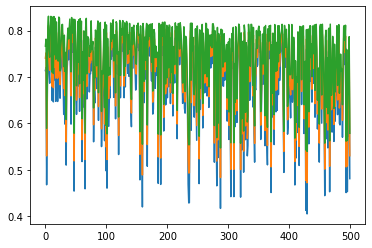

In [6]:
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])
plt.plot(estimate_ppc_df)

## <span style='color:Yellow'> Task 2  </span>
1. Edit stan model and create models with different priors. Use original setting and some priors from task 1.
2. Fit the model
3. Plot the probability of individual outcome:
<ul>
<li>plot generated paramether theta (prob_pcc): mean with its error bars (plt.errorbar)</li>
<li>to plot its error bars take into consider its 25th, 50th and 75th percentile</li>
<li>also mark the real value of y, by different colored dots (for mean values)</li>
</ul>